<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/tmd_wheelchair/June_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = np.load('/content/drive/MyDrive/TMD_data/train_5s_data.npy')
train_label = np.load('/content/drive/MyDrive/TMD_data/train_5s_label.npy')

val_data = np.load('/content/drive/MyDrive/TMD_data/valid_5s_data.npy')
val_label= np.load('/content/drive/MyDrive/TMD_data/valid_5s_label.npy')

In [ ]:
data = np.concatenate([train_data, val_data])
label = np.concatenate([train_label, val_label])
del train_data
del val_data
del train_label
del val_label

np.save("/content/drive/MyDrive/full_data_5sec", data)
np.save("/content/drive/MyDrive/full_label_5sec", label)

In [ ]:
data = np.load('/content/drive/MyDrive/full_data_5sec.npy')
label = np.load('/content/drive/MyDrive/full_label_5sec.npy')

In [ ]:
# random sampling
from sklearn.model_selection import train_test_split

train_data, val_data, train_label, val_label = train_test_split(data, label, test_size=0.2, shuffle=True, stratify=label, random_state=34)

del data
del label

In [ ]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(21274, 300, 10)
(21274, 7)
(5319, 300, 10)
(5319, 7)


In [ ]:
# CRNN GRU
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu', 
                             input_shape=((train_data.shape[1:]))))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.GRU(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.GRU(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

model_crnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data=(val_data, val_label),
                    verbose=2)

167/167 [==============================] - 1s 4ms/step - loss: 0.3166 - accuracy: 0.9278


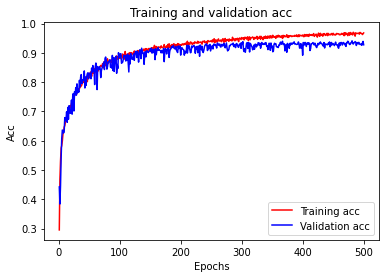

In [ ]:
model_crnn.save('/content/drive/MyDrive/TmdJune/5sec/CRNN_GRU_rand.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN GRU
# accuracy: 0.9381
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# CRNN LSTM lr 감소
import tensorflow as tf
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_crnn = Sequential()
model_crnn.add(layers.Conv1D(64, 5, activation='relu',
                             input_shape=((train_data.shape[1:]))))
# model_crnn.add(layers.Dropout(0.3))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Conv1D(128, 5, activation='relu'))
model_crnn.add(layers.MaxPooling1D(5))
model_crnn.add(layers.Dropout(0.5))
model_crnn.add(layers.LSTM(128, dropout=0.5, return_sequences = True))
model_crnn.add(layers.LSTM(64, dropout=0.5))
model_crnn.add(layers.Dense(7, activation='softmax'))

model_crnn.summary()

rmsprop = tf.keras.optimizers.RMSprop(lr=0.0009)

model_crnn.compile(optimizer=rmsprop,
                   loss= 'categorical_crossentropy',
                   metrics= ['accuracy'])

history = model_crnn.fit(train_data,
                    train_label,
                    epochs=1000,
                    batch_size=2048,
                    validation_data = (val_data, val_label),
                    verbose=2)

167/167 [==============================] - 1s 4ms/step - loss: 0.2011 - accuracy: 0.9543


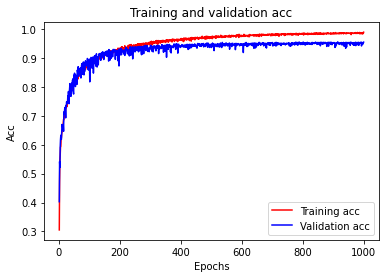

In [ ]:
model_crnn.save('/content/drive/MyDrive/TmdJune/5sec/CRNN_LSTM_rand.h5')
model_crnn.evaluate(val_data, val_label)

# CRNN with LSTM
# accuracy: 0.9543
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [ ]:
# 1D CNN
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(layers.Conv1D(64, 5, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001),
                            input_shape=((train_data.shape[1:]))))
model_cnn.add(layers.MaxPooling1D(5))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Conv1D(128, 5, activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(7, activation='softmax'))

model_cnn.summary()

model_cnn.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])

history = model_cnn.fit(train_data,
                        train_label,
                        epochs=1000,
                        batch_size=2048,
                        verbose=2,
                        validation_data = (val_data, val_label))

167/167 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.9039


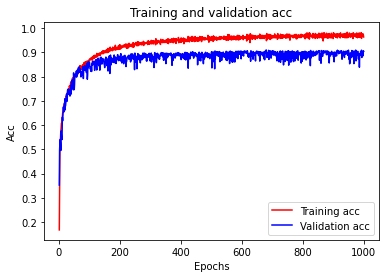

In [ ]:
model_cnn.save('/content/drive/MyDrive/TmdJune/5sec/Conv1D_rand.h5')
model_cnn.evaluate(val_data, val_label)

# 2층 1D convnet
# accuracy: 0.9039
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

---------